# Анализ бизнес показателей развлекательного приложения Procrastinate Pro+

# Описание проекта
Мы — маркетинговые аналитики развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Нам предстоит изучить:**
- откуда приходят пользователи и какими устройствами они пользуются?
- сколько стоит привлечение пользователей из различных рекламных каналов?
- сколько денег приносит каждый клиент?
- когда расходы на привлечение клиента окупаются?
- какие факторы мешают привлечению клиентов?

## Загрузим данные и подготовим их к анализу

In [1]:
# Для начала импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import time
from datetime import datetime
from datetime import date, timedelta
import warnings

warnings.filterwarnings("ignore")

In [2]:
try:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),  # журнал сессий
        pd.read_csv('orders_info_short.csv'),  # покупки
        pd.read_csv('costs_info_short.csv'),  # траты на рекламу
    )
except:
    visits, orders, costs = (
        pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),  # журнал сессий
        pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),  # покупки
        pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),  # траты на рекламу
    )

### Предобработка данных в датасете `visits`

In [3]:
visits.head(20)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


**Краткое описание каждого столбца**
- **User Id** — уникальный идентификатор пользователя,
- **Region** — страна пользователя,
- **Device** — тип устройства пользователя,
- **Channel** — идентификатор источника перехода,
- **Session Start** — дата и время начала сессии,
- **Session End** — дата и время окончания сессии.

In [4]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end']
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
visits.dtypes

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

In [8]:
# Приведем содержимое определенных столбцов к нижнему регистру для дальнейшего поиска дубликатов
visits = visits.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

In [9]:
visits.head(20)

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,united states,iphone,rocketsuperads,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,united states,android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,united states,iphone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,united states,iphone,rocketsuperads,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,united states,mac,tiptop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [10]:
# Поиск неявных дубликатов в столбце 'region'
visits['region'].unique()

array(['united states', 'uk', 'france', 'germany'], dtype=object)

In [11]:
# Поиск неявных дубликатов в столбце 'device'
visits['device'].unique()

array(['iphone', 'mac', 'android', 'pc'], dtype=object)

In [12]:
# Поиск неявных дубликатов в столбце 'channel'
visits['channel'].unique()

array(['organic', 'tiptop', 'rocketsuperads', 'yrabbit', 'faceboom',
       'mediatornado', 'adnonsense', 'leapbob', 'wahoonetbanner',
       'opplecreativemedia', 'lambdamediaads'], dtype=object)

In [13]:
# Поиск дубликатов по всему датасету
visits.duplicated().sum()

0

In [14]:
# Поиск дубликатов по ключевым столбцам
visits.duplicated(subset=['user_id', 'region', 'device', 'session_start']).sum()

0

### Предобработка данных в датасете `orders`

In [15]:
orders.head(20)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


**Краткое описание каждого столбца**
- **User Id** — уникальный идентификатор пользователя,
- **Event Dt** — дата и время покупки,
- **Revenue** — сумма заказа.

In [16]:
orders.columns = ['user_id', 'event_dt', 'revenue']
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [18]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [19]:
orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

In [20]:
# Поиск дубликатов по всему датасету
orders.duplicated().sum()

0

In [21]:
# Поиск дубликатов по ключевым столбцам
orders.duplicated(subset=['user_id', 'event_dt']).sum()

0

### Предобработка данных в датасете `costs`

In [22]:
costs.head(20)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


**Краткое описание каждого столбца**
- **dt** — дата проведения рекламной кампании,
- **Channel** — идентификатор рекламного источника,
- **costs** — расходы на эту кампанию.

In [23]:
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [24]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [25]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [26]:
costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

In [27]:
costs['channel'] = costs['channel'].str.lower()

In [28]:
costs.head(20)

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1
5,2019-05-06,faceboom,118.8
6,2019-05-07,faceboom,101.2
7,2019-05-08,faceboom,100.1
8,2019-05-09,faceboom,93.5
9,2019-05-10,faceboom,104.5


In [29]:
# Поиск неявных дубликатов в столбце 'channel'
costs['channel'].unique()

array(['faceboom', 'mediatornado', 'rocketsuperads', 'tiptop', 'yrabbit',
       'adnonsense', 'leapbob', 'opplecreativemedia', 'wahoonetbanner',
       'lambdamediaads'], dtype=object)

In [30]:
# Поиск дубликатов по всему датасету
costs.duplicated().sum()

0

In [31]:
# Поиск дубликатов по ключевым столбцам
costs.duplicated(subset=['dt', 'channel']).sum()

0

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии

### Функции для вычисления значений метрик:

**get_profiles() — для создания профилей пользователей**

In [32]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**get_retention() — для подсчёта Retention Rate**

In [33]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**get_conversion() — для подсчёта конверсии**

In [34]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**get_ltv() — для подсчёта LTV**

In [35]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции для построения графиков:

**filter_data() — для сглаживания данных**

In [36]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**plot_retention() — для построения графика Retention Rate**

In [37]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**plot_conversion() — для построения графика конверсии**

In [38]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**plot_ltv_roi — для визуализации LTV и ROI**

In [39]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей

In [40]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head()) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    faceboom     mac  united states   
1   4919697 2019-07-09 12:46:07    faceboom  iphone  united states   
2   6085896 2019-10-01 09:58:33     organic  iphone         france   
3  22593348 2019-08-22 21:35:48  adnonsense      pc        germany   
4  31989216 2019-10-02 00:07:44     yrabbit  iphone  united states   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [41]:
print(f'''Минимальная дата привлечения пользователей - {profiles['first_ts'].dt.date.min()}
Максимальная дата привлечения пользователей - {profiles['first_ts'].dt.date.max()}''')

Минимальная дата привлечения пользователей - 2019-05-01
Максимальная дата привлечения пользователей - 2019-10-27


### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [42]:
def piv_table(df, dimension):
    table = (df.pivot_table(index=dimension, values = 'payer', aggfunc=[len, np.mean])
                  .droplevel(1, axis=1).sort_values(by='len', ascending=False).reset_index())
    table['mean'] = round(table['mean'] * 100, 2)
    table.columns = [dimension, 'total_users', 'perc_payers']
    return table

In [43]:
top_regions = piv_table(profiles, 'region')
top_regions

,region,total_users,perc_payers
0,united states,100002,6.90
1,uk,17575,3.98
2,france,17450,3.80
3,germany,14981,4.11


Как видно по сводной таблице, страной-лидером по притоку пользователей в приложение является **united states** - 100 000 пользователей, почти в 6 раз больше по сравнению с другими странами, соответственно, доля платящих клиентов здесь больше - 6,9%. Что касается других стран, то с одинаковым численным притоком пользователей выделяются **uk** и **france** - больше 17 000 человек, доля платящих в этих странах находится в районе 4%. Страна с самым низким количеством приходящих пользователей - это **germany**, почти 15 000 пользователей, но доля платящих уже более 4%.

### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [44]:
top_devices = piv_table(profiles, 'device')
top_devices

,device,total_users,perc_payers
0,iphone,54479,6.21
1,android,35032,5.85
2,pc,30455,5.05
3,mac,30042,6.36


Топовым устройством, которым пользуется большинство пользователей - **iphone** (больше 54 000 человек), доля платящих составляет больше 6%, тут же можно выделить и другую линейку устройств от `Apple` - **mac**, число пользователей которой равно 30 000, но доля платящих также больше 6%, что выше чем у других устройств. Второе место занимают пользователи **android** c 35 000 человек и долей платящих 5,8%. Замыкают пользователи **pc**, 30 000 человек и 5% доля платящих.

In [45]:
perc_d_per_r = profiles.pivot_table(index=['region', 'device'], values = 'user_id', aggfunc='count').reset_index()
perc_d_per_r.columns = ['region', 'device', 'amount_devices']
perc_d_per_r['ratio,%'] = (round(perc_d_per_r['amount_devices'] / 
                                            perc_d_per_r.groupby('device')['amount_devices'].transform(sum) * 100, 2))
perc_d_per_r

,region,device,amount_devices,"ratio,%"
0,france,android,5252,14.99
1,france,iphone,3420,6.28
2,france,mac,1838,6.12
3,france,pc,6940,22.79
4,germany,android,4440,12.67
5,germany,iphone,3012,5.53
6,germany,mac,1584,5.27
7,germany,pc,5945,19.52
8,uk,android,5141,14.68
9,uk,iphone,3518,6.46


### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [46]:
top_channels = piv_table(profiles, 'channel')
top_channels

,channel,total_users,perc_payers
0,organic,56439,2.06
1,faceboom,29144,12.20
2,tiptop,19561,9.60
3,opplecreativemedia,8605,2.71
4,leapbob,8553,3.06
5,wahoonetbanner,8553,5.30
6,rocketsuperads,4448,7.91
7,mediatornado,4364,3.57
8,yrabbit,4312,3.83
9,adnonsense,3880,11.34


Лидером, по результатам сводной таблицы, по количество пришедших пользователей, является канал привлечения `organic` («органический трафик»; пользователи перешедшие в приложение через поиск/по рекомендациям), но доля платящих составляет всего 2%. Если рассматривать рекламные источники, то выделяются **Faceboom**, 29 000 привлеченных пользователей (доля платящих 12,2%) и **TipTop**, около 20 000 пользователей (9,6% доля платящих). Также, имеет смысл выделить следующие каналы: **Rocketsuperads**, **Adnonsense** и **Lambdamediaads**, количество привлеченных пользователей не превышают 5000 человек, но конверсия в долю платящих - 8-11%, что является хорошим подспорьем.

## Маркетинг

### Посчитаем общую сумму расходов на маркетинг

In [47]:
total_costs = round(costs['costs'].sum())
print(f'''Общая сумма расходов на маркетинг - {total_costs} долларов''')

Общая сумма расходов на маркетинг - 105497 долларов


### Выясним, как траты распределены по рекламным источникам (т.е сколько денег потратили на каждый источник)

In [48]:
channel_costs = costs
channel_costs['dt'] = pd.to_datetime(channel_costs['dt'])

In [49]:
pivot_channel_costs = (channel_costs.pivot_table(index='channel', values='costs', aggfunc='sum')
                 .sort_values(by='costs', ascending=False).reset_index())
pivot_channel_costs['ratio,%'] = round((pivot_channel_costs['costs'] / total_costs) * 100, 2)
pivot_channel_costs

,channel,costs,"ratio,%"
0,tiptop,54751.30,51.90
1,faceboom,32445.60,30.75
2,wahoonetbanner,5151.00,4.88
3,adnonsense,3911.25,3.71
4,opplecreativemedia,2151.25,2.04
5,rocketsuperads,1833.00,1.74
6,leapbob,1797.60,1.70
7,lambdamediaads,1557.60,1.48
8,mediatornado,954.48,0.90
9,yrabbit,944.22,0.90


Лидером по затратам на рекламу является источник привлечения **TipTop** - почти 55 000 долларов, второе место занимает **Faceboom** - 32 000; и тройку замыкает канал **Wahoonetbanner** - 5000.

### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

#### Изменение расходов по неделям

In [50]:
channel_costs_per_week = channel_costs.pivot_table(index=channel_costs['dt'].dt.week, 
                                                            columns='channel', values='costs', aggfunc='sum')
channel_costs_per_week

channel,adnonsense,faceboom,lambdamediaads,leapbob,mediatornado,opplecreativemedia,rocketsuperads,tiptop,wahoonetbanner,yrabbit
dt,,,,,,,,,,
18,211.05,535.7,81.6,16.80,38.64,24.00,99.450,347.0,49.2,52.20
19,273.00,750.2,103.2,31.71,61.68,34.50,139.230,470.0,92.4,75.90
20,265.65,755.7,90.4,26.67,59.04,27.50,138.060,454.0,90.0,69.30
21,266.70,722.7,119.2,26.67,50.16,34.25,131.040,801.8,79.2,65.40
22,202.65,1208.9,83.2,65.52,36.96,81.75,97.695,1421.2,179.4,49.80
23,102.90,1081.3,35.2,66.99,27.60,79.50,76.050,1223.6,196.8,25.80
24,96.60,1042.8,45.6,52.29,29.76,71.50,63.180,1121.0,166.2,17.46
25,141.75,1280.4,40.0,68.46,32.16,79.75,80.730,1474.4,201.6,22.14
26,148.05,1647.8,59.2,99.75,40.56,107.00,78.260,2343.6,285.0,27.90


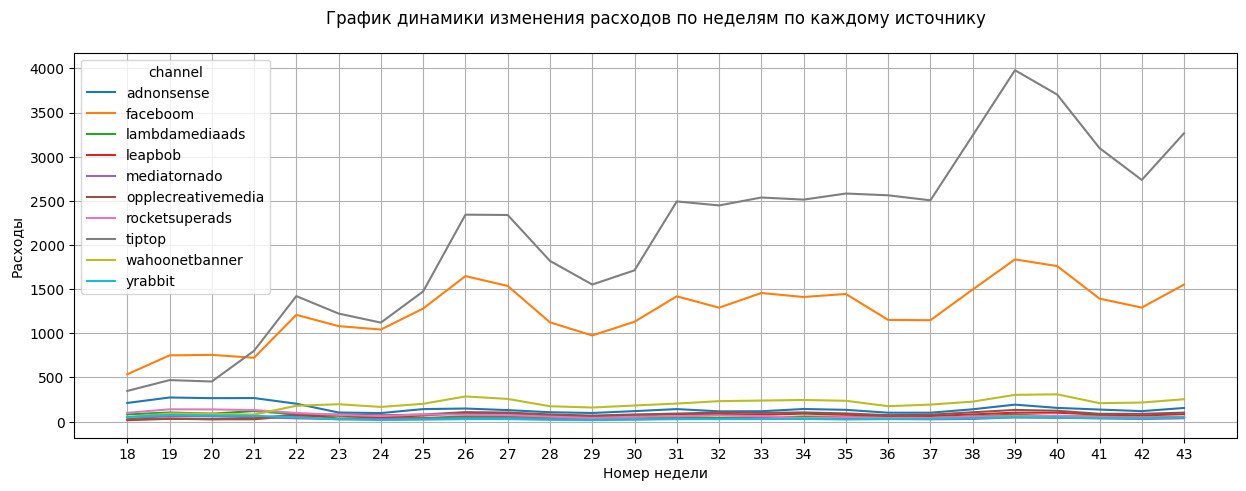

In [51]:
channel_costs_per_week.plot(grid=True, figsize=(15, 5))
plt.title('График динамики изменения расходов по неделям по каждому источнику\n')
plt.xlabel('Номер недели')
plt.ylabel('Расходы')
plt.xticks(np.arange(18, 44, 1));

Как видно по графику, и в потверждении выводам выше, лидерами по затратам на рекламу являются источники привлечения **TipTop** и **Faceboom**. Если **Faceboom** имеет более равномерный график, то **TipTop** имеет более кривую линию и продолжает расти. Динамика расходов по остальным каналам равномерно распраделена по всем неделям.

#### Изменение расходов по месяцам

In [52]:
channel_costs_per_month = channel_costs.pivot_table(index=channel_costs['dt'].dt.month, 
                                                columns='channel', values='costs', aggfunc='sum')
channel_costs_per_month

channel,adnonsense,faceboom,lambdamediaads,leapbob,mediatornado,opplecreativemedia,rocketsuperads,tiptop,wahoonetbanner,yrabbit
dt,,,,,,,,,,
5,1169.70,3524.4,458.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70
6,538.65,5501.1,199.2,314.58,138.00,370.00,325.715,6675.6,921.0,106.20
7,504.00,5294.3,219.2,313.53,138.48,366.50,252.070,8410.2,851.4,97.38
8,579.60,6274.4,220.0,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74
9,581.70,6114.9,247.2,343.98,144.72,427.75,218.400,13232.5,977.4,152.79
10,537.60,5736.5,213.6,315.42,140.16,378.00,205.725,12250.0,942.0,163.41


Text(0, 0.5, 'Расходы')

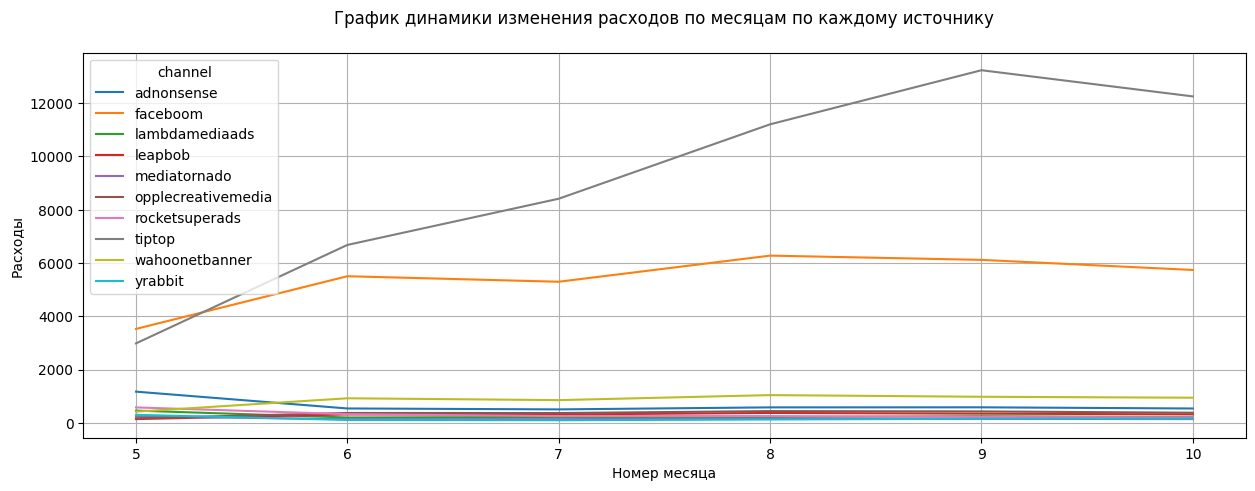

In [53]:
channel_costs_per_month.plot(grid=True, figsize=(15, 5))
plt.title('График динамики изменения расходов по месяцам по каждому источнику\n')
plt.xlabel('Номер месяца')
plt.ylabel('Расходы')

Та же картина, но в разрезе по месяцам: **Faceboom** имеет более равномерную линию, **TipTop** - динамика изменения расходов увеличивается с каждым месяцем, наблюдается небольшая просадка с сентября 2019 г по октябрь того же года. Остальные каналы также равномерно распраделены.

### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

In [54]:
cac_channel = profiles.query('channel != "organic"')
median_cac = round(cac_channel['acquisition_cost'].median(), 2)
print(f'''Медианное значение стоимости привлечения одного пользователя - {median_cac} долларов''')

Медианное значение стоимости привлечения одного пользователя - 1.08 долларов


In [55]:
cac_pivot = (cac_channel.pivot_table(index='channel', values='acquisition_cost', aggfunc='median')
             .sort_values(by='acquisition_cost', ascending=False).reset_index())
cac_pivot

,channel,acquisition_cost
0,tiptop,3.000000
1,faceboom,1.114667
2,adnonsense,1.004348
3,lambdamediaads,0.733333
4,wahoonetbanner,0.600000
5,rocketsuperads,0.404444
6,opplecreativemedia,0.250000
7,mediatornado,0.220926
8,yrabbit,0.214286
9,leapbob,0.210000


Лидером, соответственно, является соцсеть **TipTop**, здесь стоимость привлечения за одного пользователя равна 3 долларам, самая большая сумма по сравнению с другими. Более результативные источники привлечения, с большой конверсией в платящего пользователя, а именно: **Faceboom**, **Adnonsense**, **Lambdamediaads** и **Rocketsuperads** имеют куда более низкий CAC - от 0,4 до 1,11 долларов за пользователя. 4-ку с самим низким CAC замыкают **Opplecreativemedia**, **Mediatornado**, **Yrabbit** и **Leapbob** - стоимость привлечения ~ 0,21 доллара, но конверсия по этим каналам не превышает 3,5%.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Также, не будем включать пользователей из органического трафика.

### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

In [56]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
profiles = profiles.query('channel != "organic"') # исключим пользователей пришедших с "органического трафика"

In [57]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

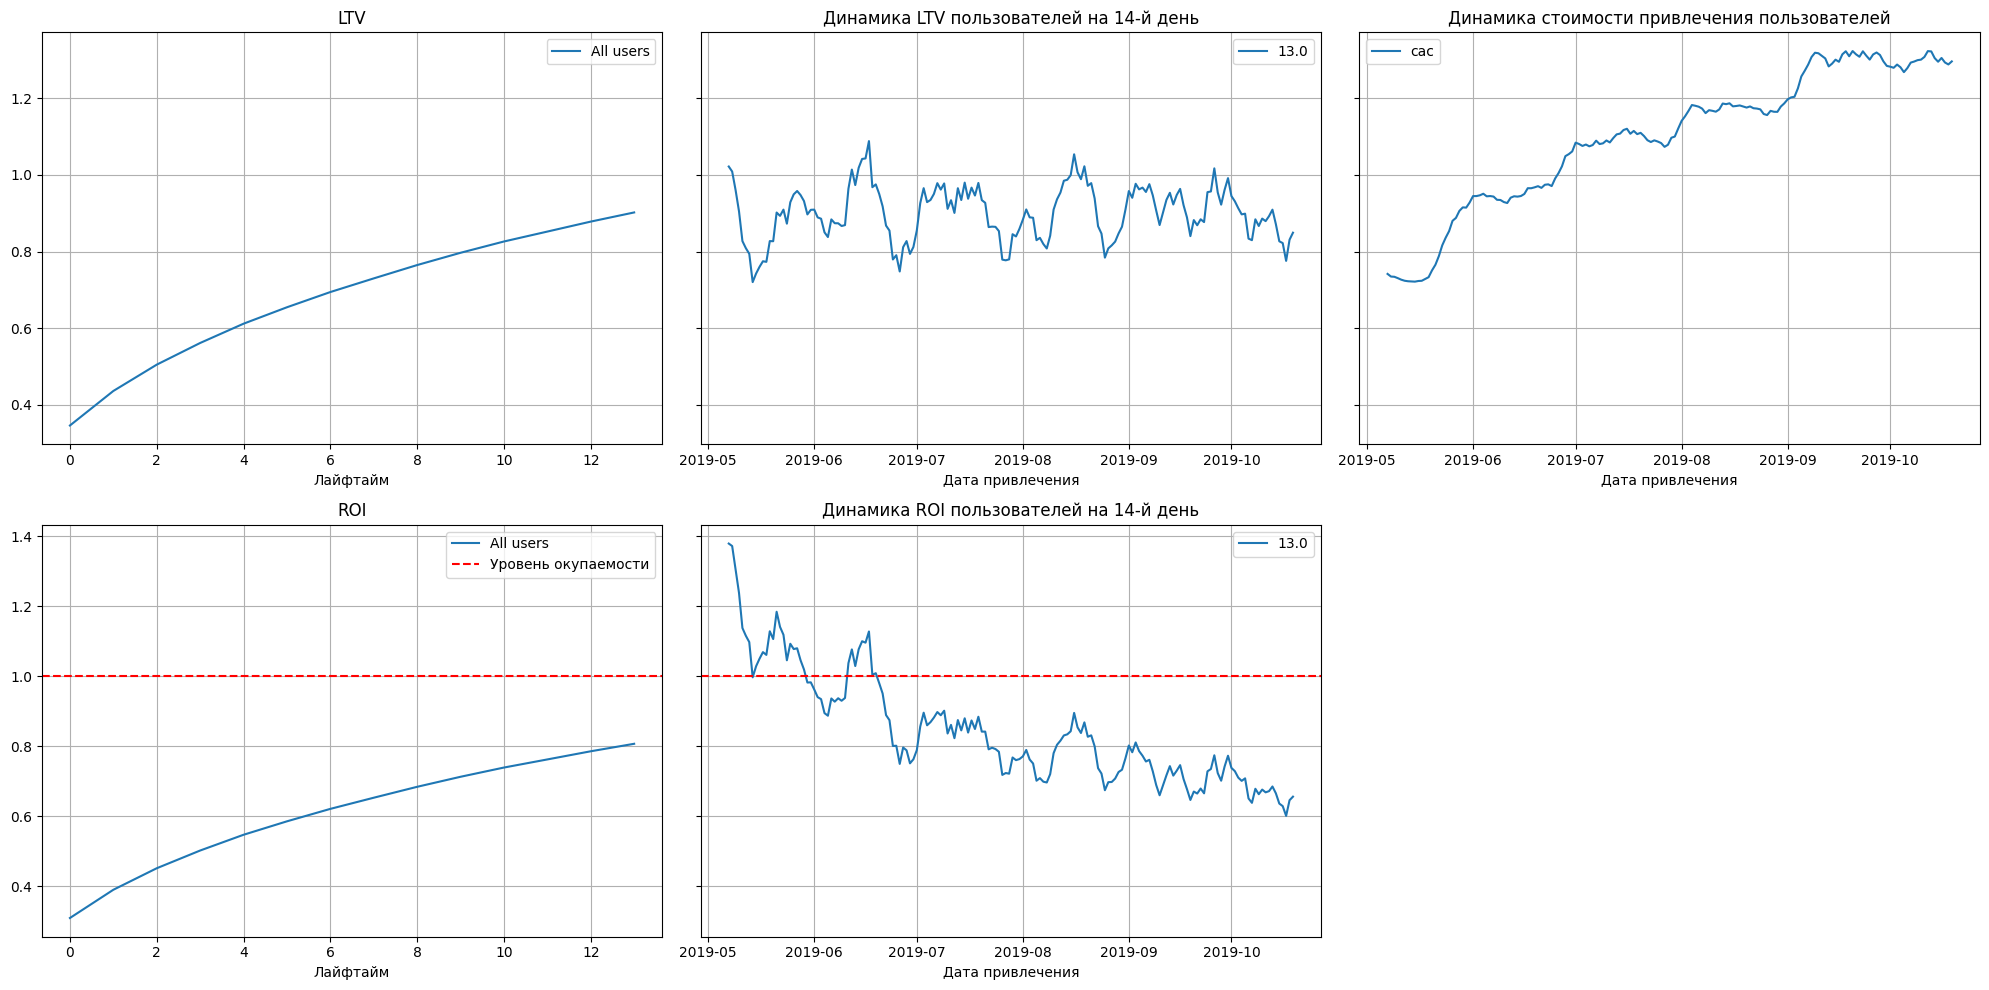

In [58]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
- На LTV влияет сезонный фактор, но этот показатель достаточно стабилен.
- CAC нестабилен. Наблюдается сильное увеличение рекламного бюджета.
- Реклама не окупается. ROI в конце 2-ой недели — чуть выше 80%. Стоит отметить, что ROI был положителен в мае 2019 г, но после июня того же года, начался спад.

### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

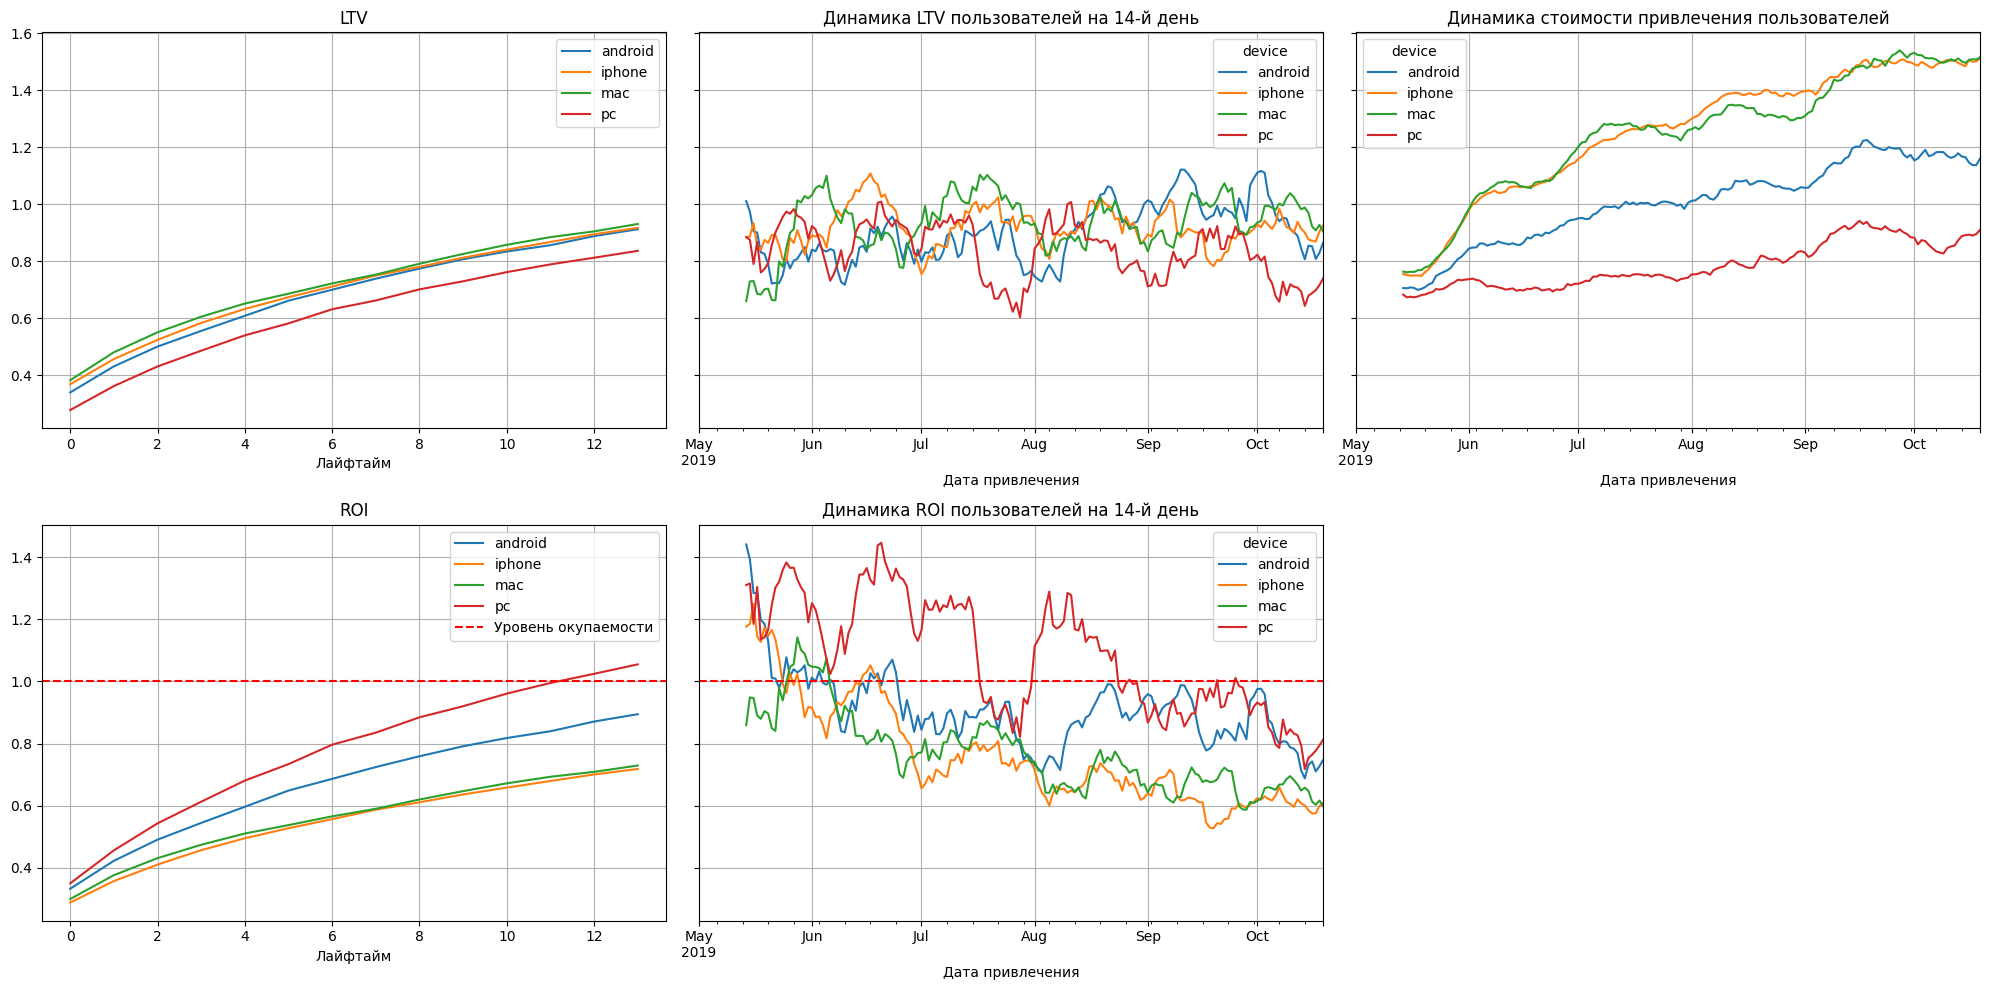

In [59]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Посмотрев на графики, можно сделать следующие выводы:
- Показатель LTV достаточно стабилен.
- CAC нестабилен и растет, также CAC сильно завышен для владельцев продукции `Apple`. Стоимость привлечения пользователей **iphone** и **mac** существенно выше, чем для владельцев других устройств.
- Реклама не окупается. Единственная платформа, для которой реклама окупилась - это **pc**, критическая ситуация наблюдается для владельцев **iphone** и **mac**, ROI в конце неделе ниже 80%. Владельцы **android** показывают себя лучше, ROI почти 90%.

### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

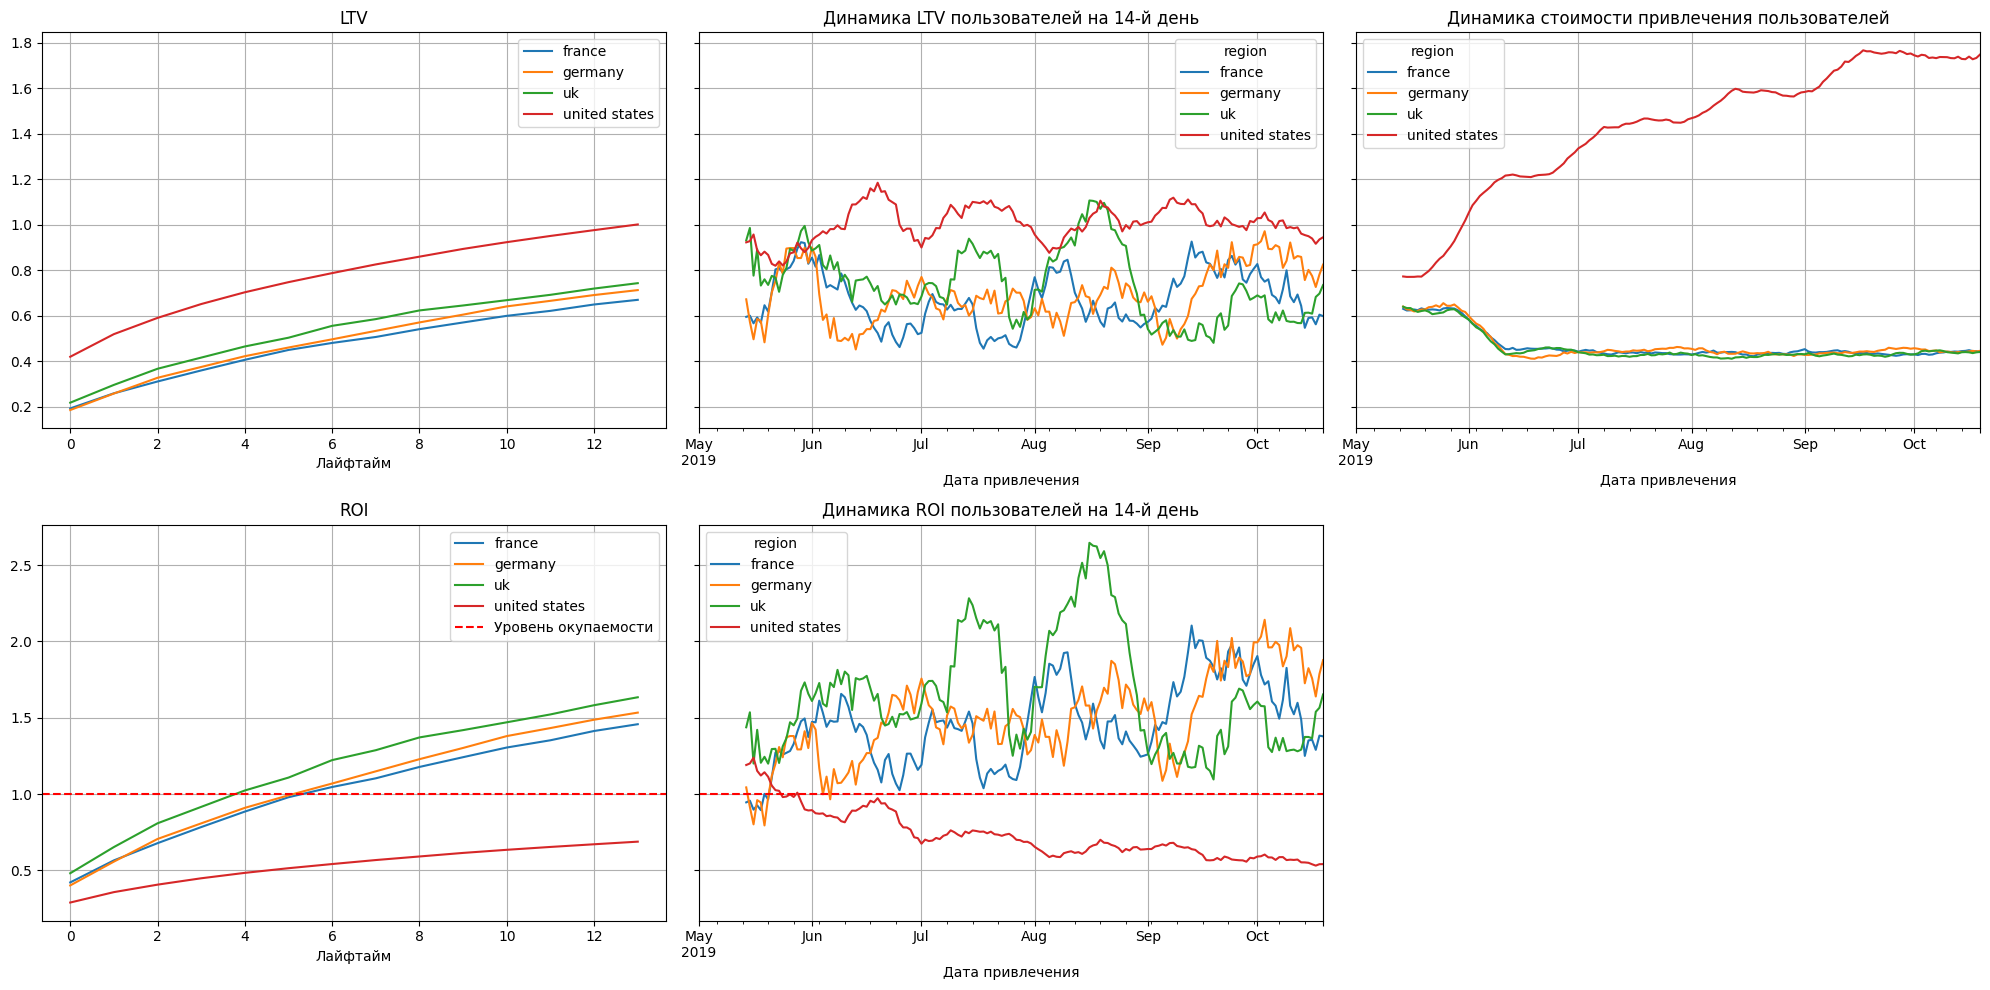

In [60]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Исходя из графиков, у нас следующие результаты:
- LTV всё так же подвержен сезонности, но стабилен.
- Стоимость привлечения для жителей **united states** выше и растет на протяжении всего исследования. Что касается других стран, то тут ситуация иная, график имеет спад в периоде с мая 2019 г до середины июня того же года, а далее стабилен до конца исследования.
- Реклама окупилась для всех стран, кроме **united states**, что настораживает.

In [61]:
regions = ['united states', 'germany', 'france', 'uk']

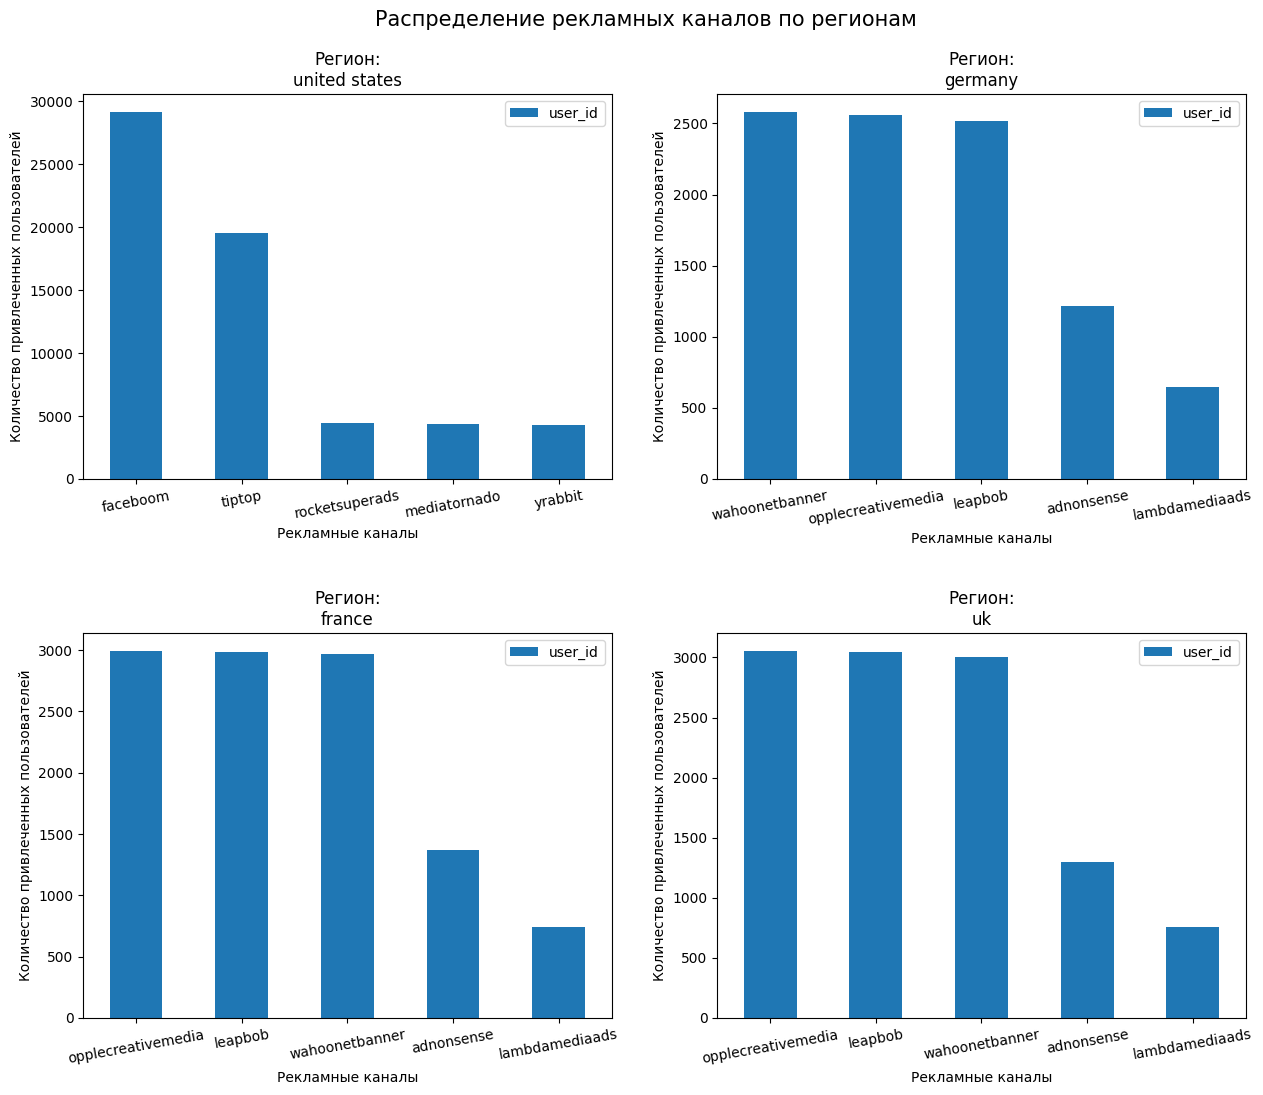

In [62]:
plt.figure(figsize=(15, 12))
plt.suptitle(f'Распределение рекламных каналов по регионам', y = 0.95, fontsize=15)
plt.subplots_adjust(hspace=0.4)
for n, reg in enumerate(regions):
    profiles_reg = profiles.query('region == @reg')
    top_channels = (profiles_reg.pivot_table(index='channel', values='user_id', aggfunc='count')
                    .sort_values(by='user_id', ascending=False).reset_index())
    
    ax = plt.subplot(2, 2, n + 1)
    top_channels.plot(kind='bar', ax=ax, rot = 10)
    title = (reg)
    ax.set_xticklabels(top_channels['channel'])
    ax.set_title(f'Регион:\n{title}')
    ax.set_ylabel('Количество привлеченных пользователей')
    ax.set_xlabel('Рекламные каналы')

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

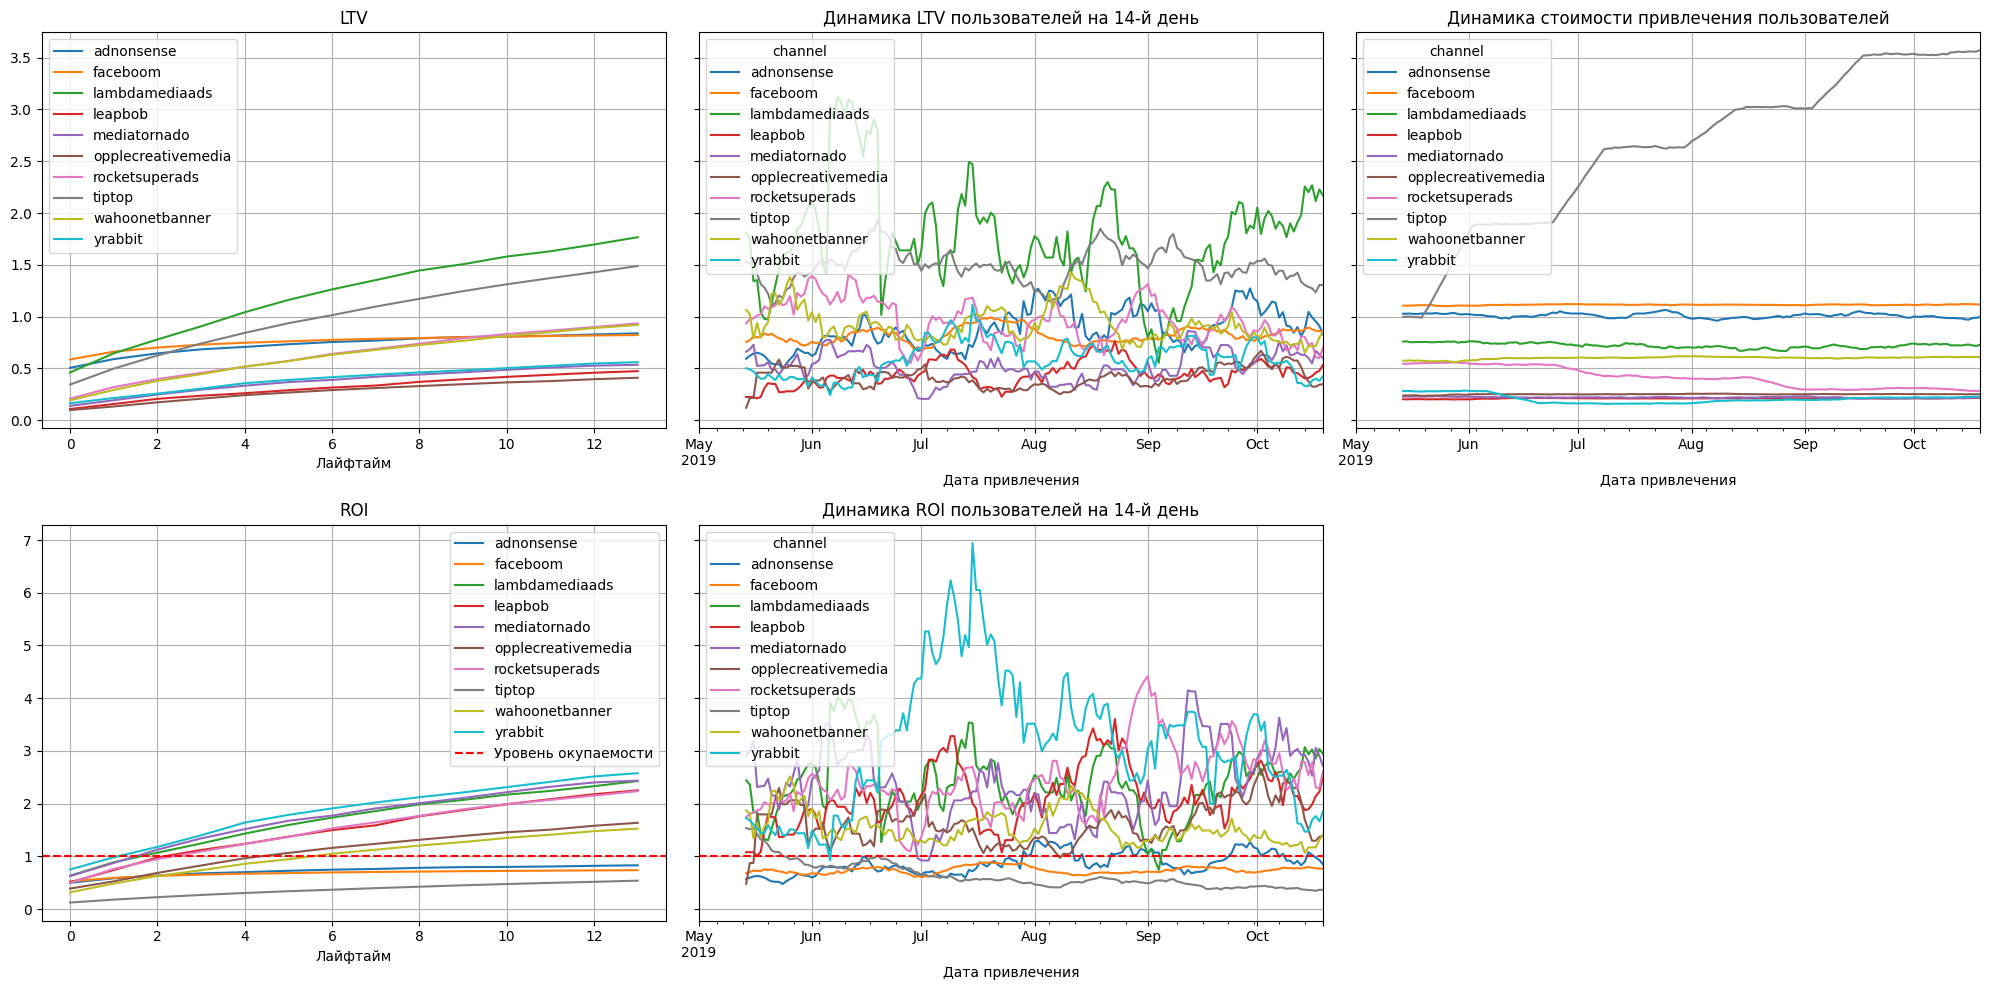

In [63]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Можно сделать следующие выводы:
- LTV стабилен.
- CAC стабилен для всех источников привлечения, кроме канала **TipTop**; график этого источника ежемесячно растет до конца исследования, что ставит под сомнение целесообразность дальнейшего сотрудничества.
- ROI окупилось почти по всем рекламным каналам, а лучше всех показывают себя следующие каналы: **Yrabbit**, **Lambdamediaads**, **Opplecreativemedia**, **Rocketsuperads**, **Leapbob**. Чего нельзя сказать о **TipTop**, **Faceboom** и **Adnonsense**, несмотря на высокую конверсию последних двух источников. Динамика ROI вполне стабильна, кроме большого всплеска канала **Yrabbit** в периоде с июля 2019 г по август 2019 г.

### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем и с удержанием пользователей. Построим и изучим графики конверсии и удержания.

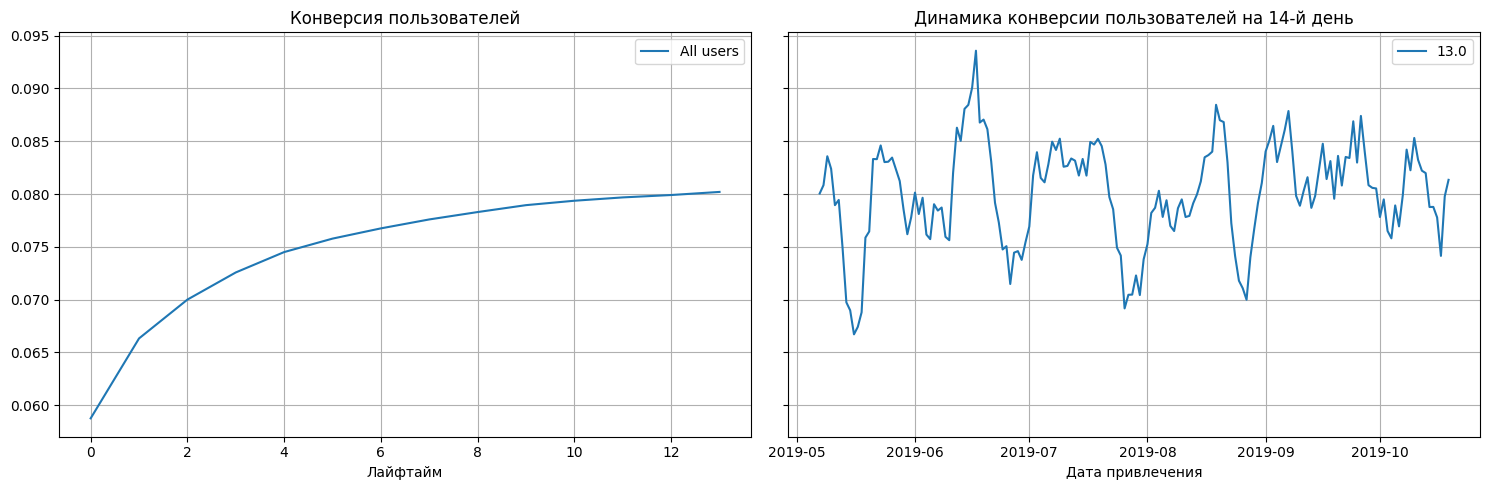

In [64]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Как видно на графиках, с конверсией проблем нет, как и график динамики - он вполне стабилен. Имеет смысл посмотреть удержание пользователей.

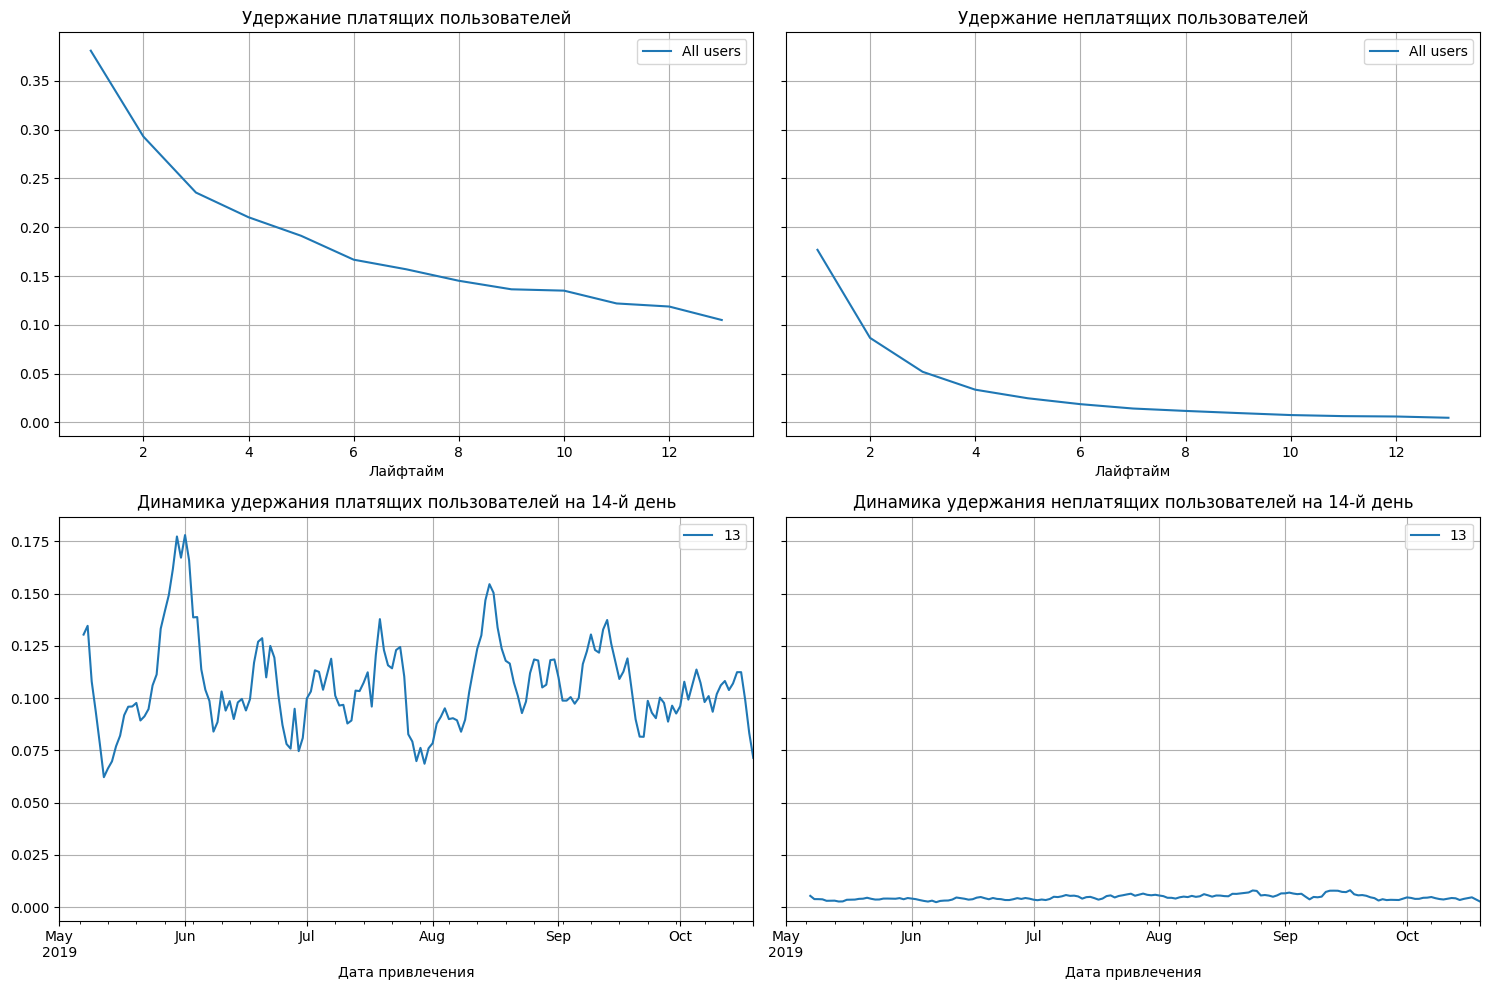

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Как видно по графикам, пользователи к концу второй недели плохо удерживаются. Динамика удержания весьма стабильна.

### Конверсия и удержание пользователей и их динамика изменения с разбивкой по регионам.

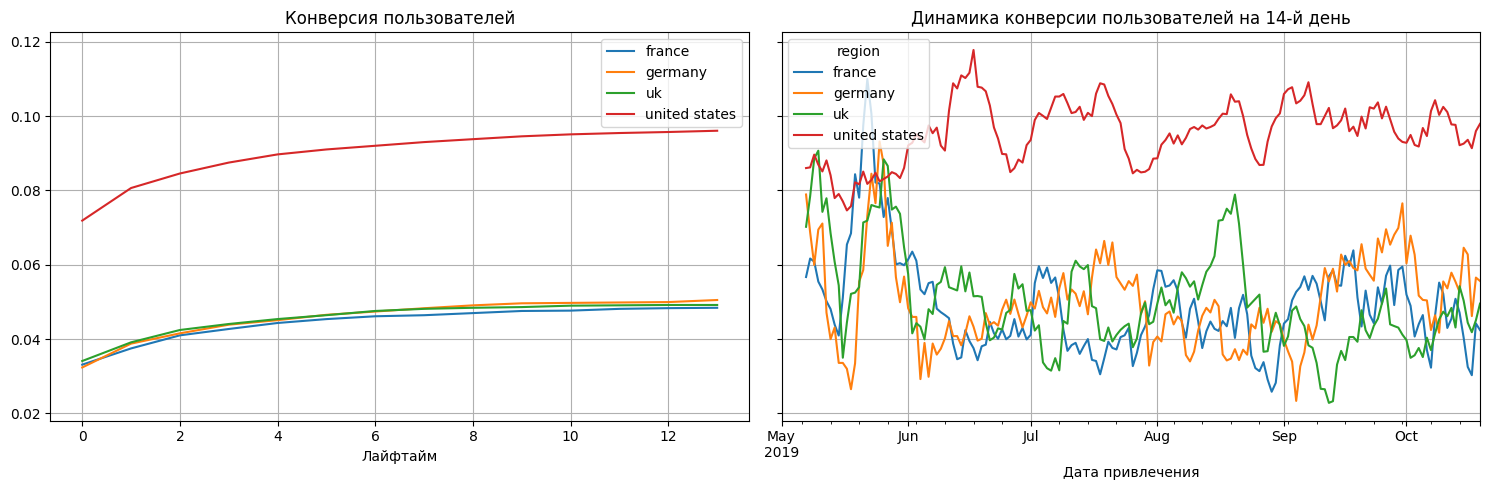

In [66]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Как видно по графику, самая большая конверсия у США, это и неудивительно, потому что у этого региона самое большое количество привлеченных пользователей. Что касается динамики, то она стабильна для каждого региона в целом.

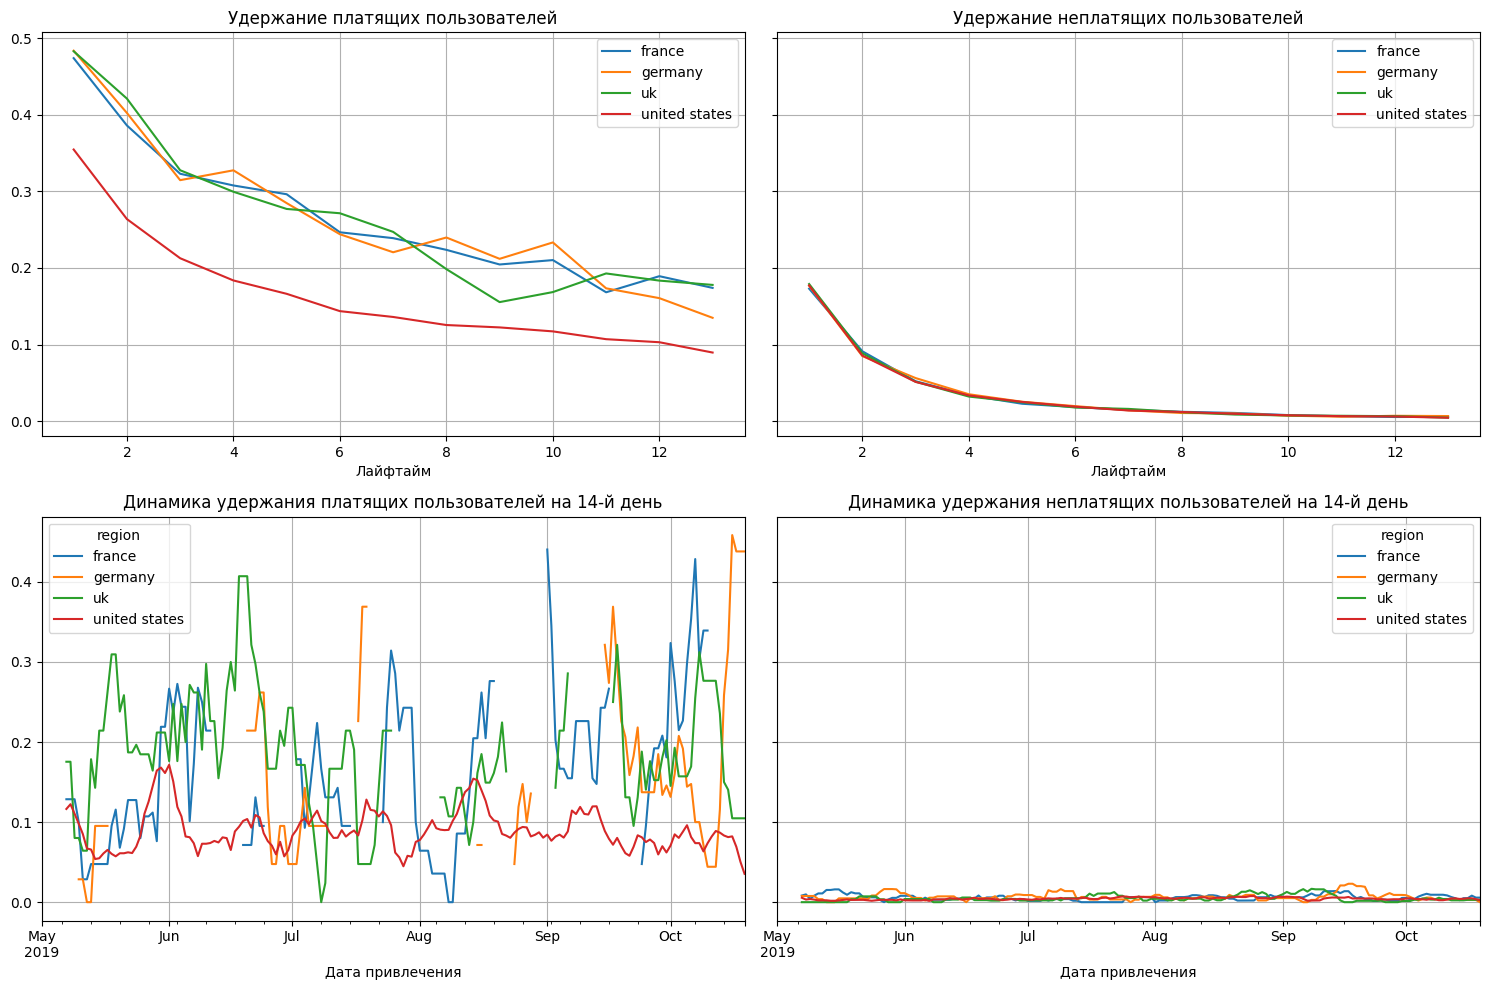

In [67]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Несмотря на лидерство в конверсии, у США возникают большие трудности с удержанием пользователей, по сравнению с другими странами. Удержание неплатящих пользователей одинаково для все регионов. Динамика удержания платящих пользователей на 14-й день стабильна только для региона США, график для других стран более непостоянен.

### Конверсия и удержание пользователей и их динамика изменения с разбивкой по устройствам.

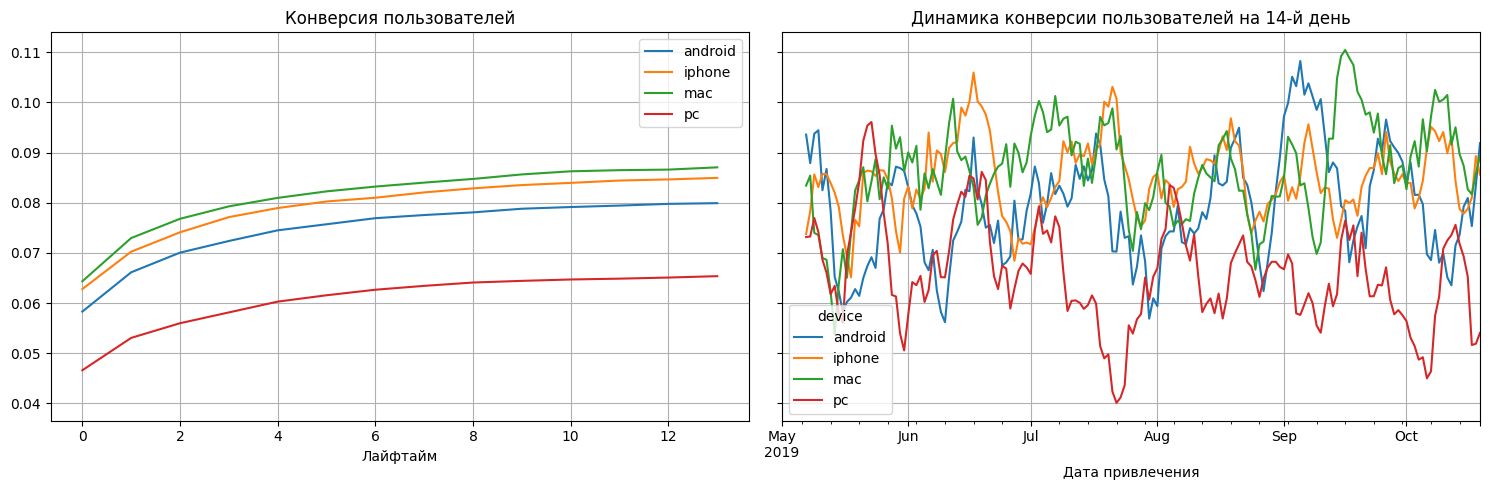

In [68]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Низкая конверсия наблюдается для пользователей **pc** и **android**. Динамика стабильна для всех устройств.

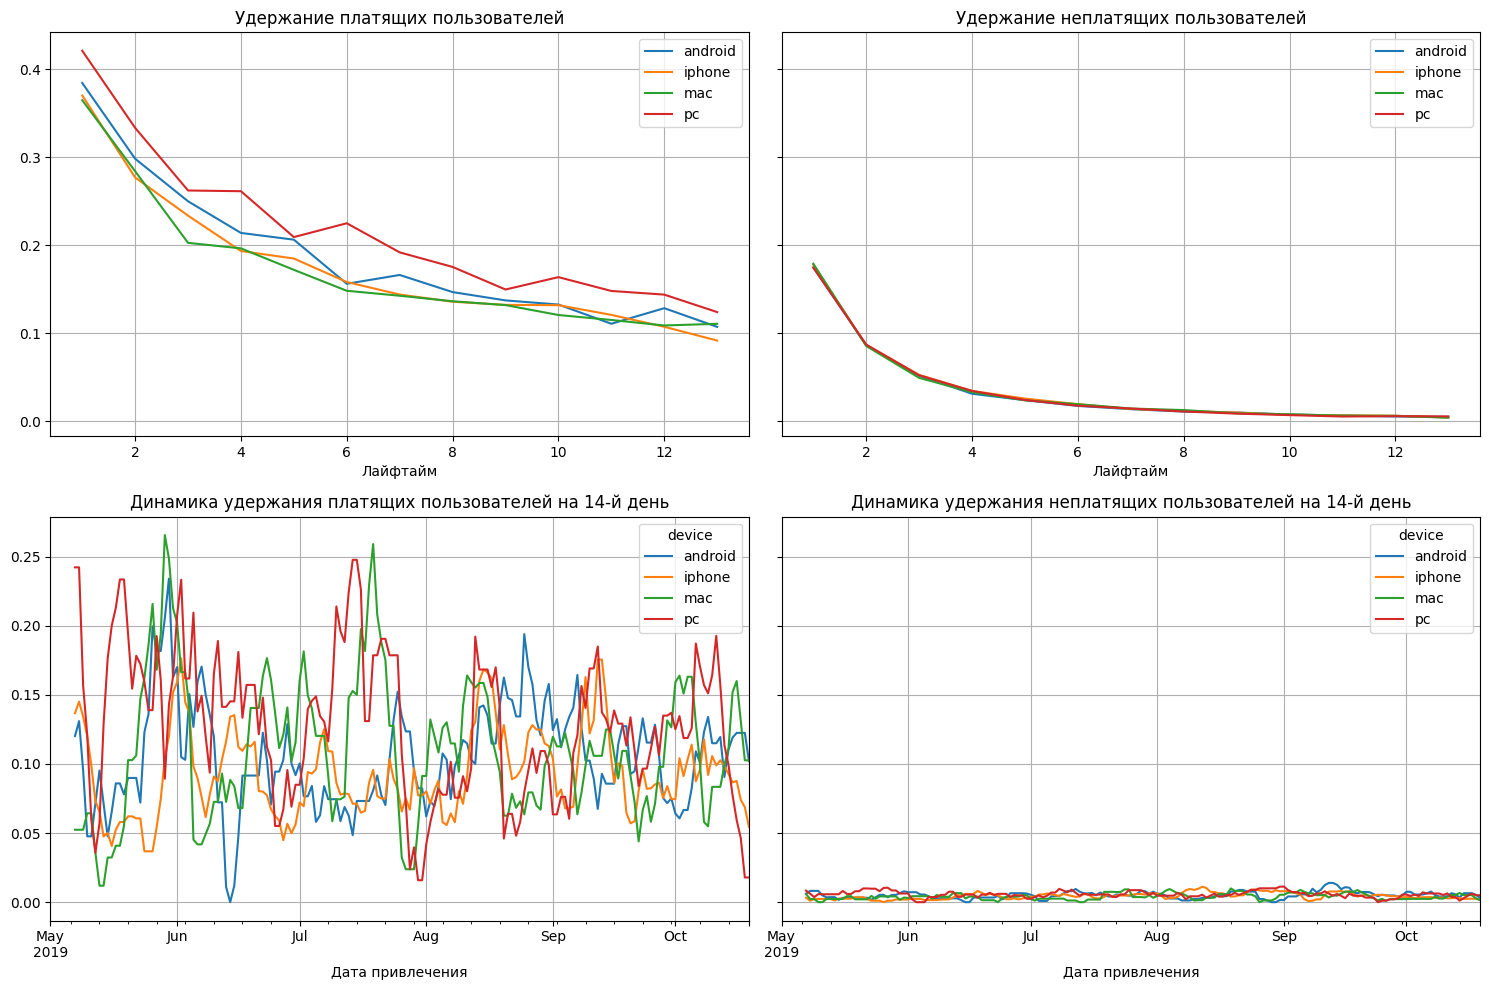

In [69]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Несмотря на низкую конверсию, удержание у вышеупомянутых устройств выше,чем у других. В частности **pc**. Динамика удержания одинакова и стабильна для всех платформ.

### Конверсия и удержание пользователей и их динамика изменения с разбивкой по каналам привлечения.

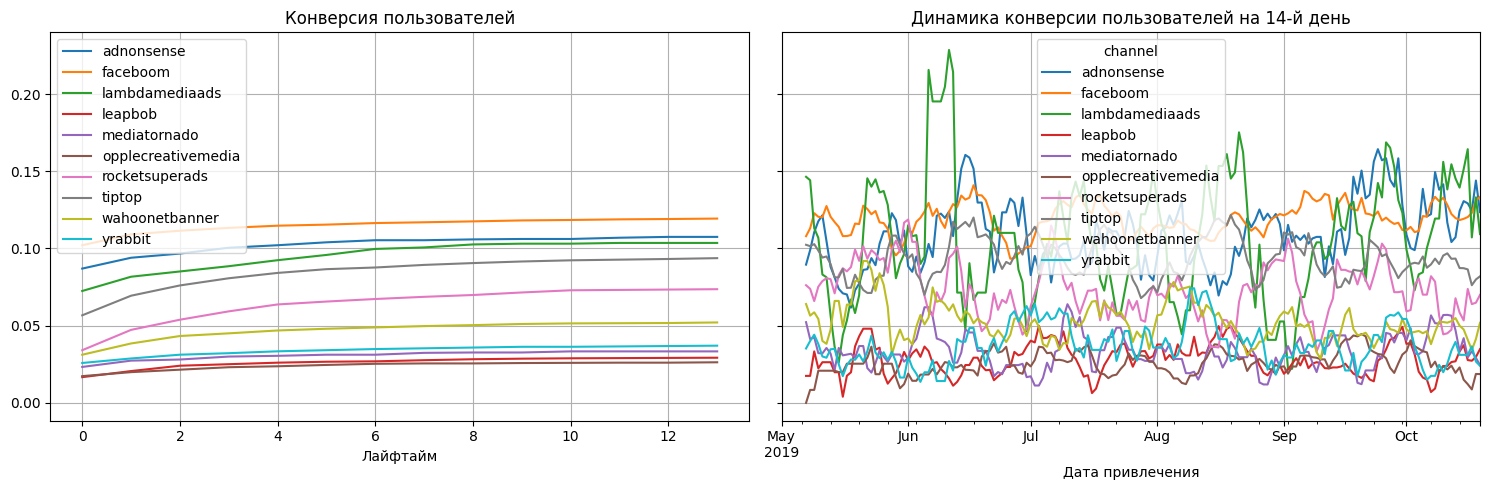

In [70]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Тройка лидеров по конверсии в платящих пользователей являются каналы: **Faceboom**, **Adnonsense**,  **Lambdamediaads**. **TipTop** занимает 4 строчку, также стоит отметить **Rocketsuperads**. Динамика, в принципе, одинакова и стабильна для всех каналов.

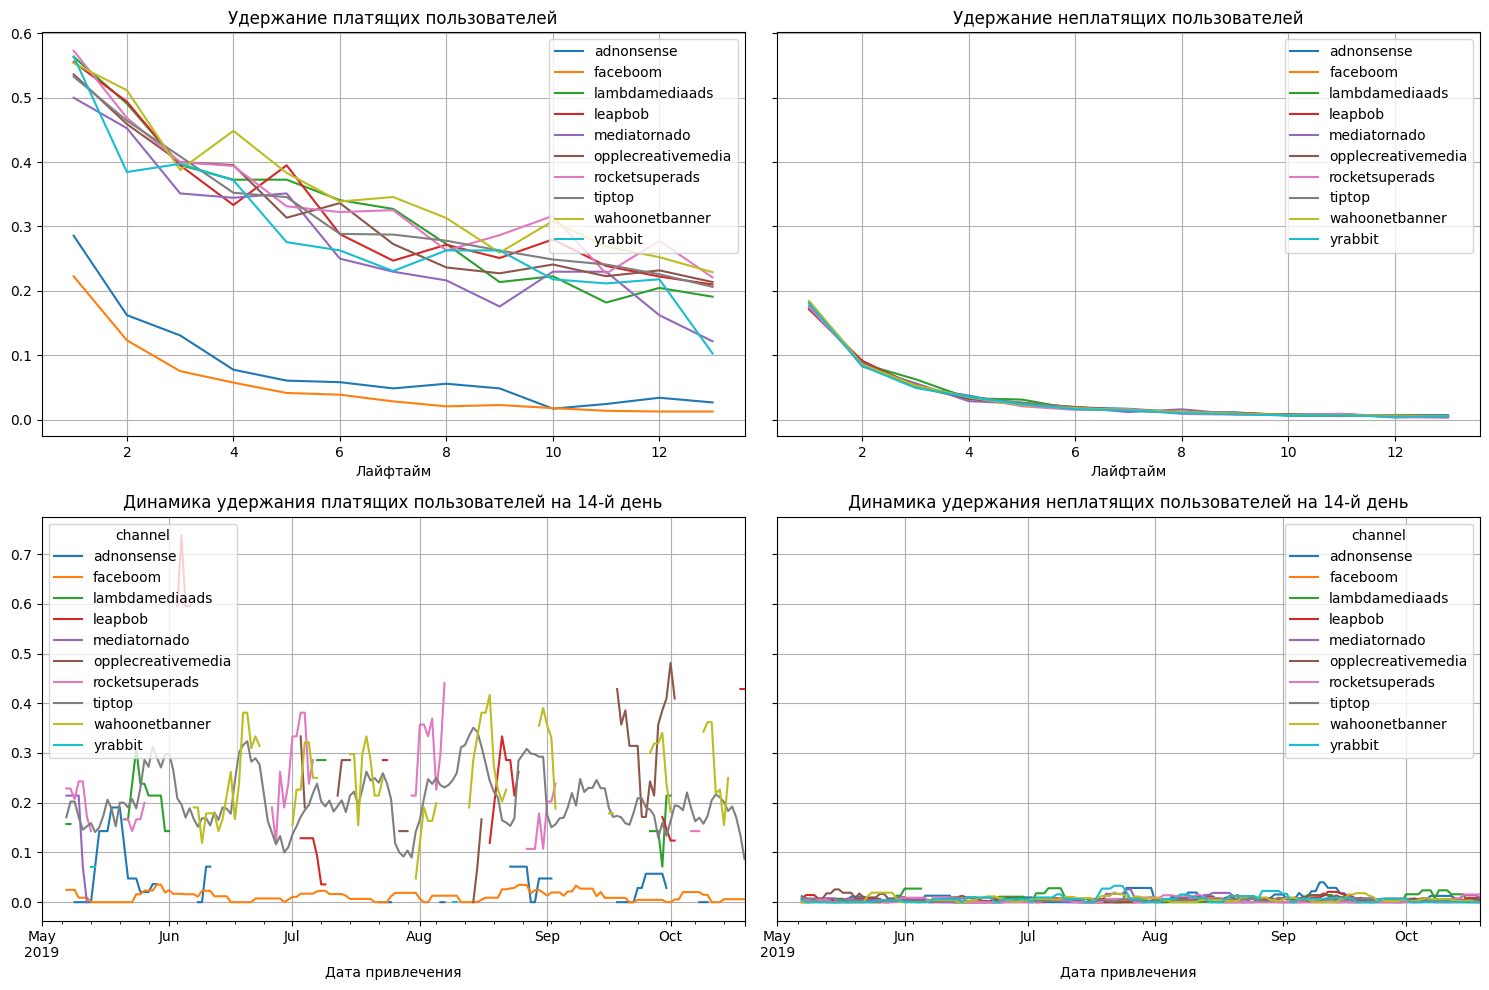

In [71]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Самое низкое удержание у **Faceboom** и **Adnonsense**. **TipTop** несмотря на высокий CAC удерживает пользователей лучше. **Lambdamediaads**, **Wahoonetbanner**, **Rocketsuperads** хорошо удерживают пользователей. Динамика для всех каналов одинакова и стабильна.

**Для формирования выводов, зададим и ответим на следующие вопросы:**
- **Окупается ли реклама, направленная на привлечение пользователей в целом?**
- **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**
- **Чем могут быть вызваны проблемы окупаемости?**

- Реклама не окупается. ROI в конце 2-ой недели чуть выше 80%.
- Пользователи, использующие устройства компании `Apple` (iphone, mac) имеют высокую стоимость привлечения и не окупаются в конце второй недели. Те же показатели для пользователей из региона `united states`, такая же высокая стоимость привлечения и отсутствие окупаемости. В список худших рекламных каналов можно отнести однозначно `TipTop`, также не окупаются инвестиции в следующих каналах: `Faceboom`, `Adnonsense`.  
- Одной из основных проблем это неправильное распределение рекламных средств: в дорогие источники привлечения, такие как `TipTop`, так и растущие показатели стоимости привлечения для пользователей из региона `united states` и пользователей использующих продукцию компании `Apple`.

## Выводы

Из результатов всего исследования мы можем обозначить некоторые причины низких показателей доходности приложения **Procrastinate Pro+**. Следует отметить, что убытки, в основном, связаны с высокой стоимостью привлечения и низкой окупаемостью для отдельных рекламных каналов, платформ, которые используют пользователи и регионов откуда идет новый приток пользователей:  
- Пользователи, использующие устройства компании `Apple` (iphone, mac). Возможно, связано с особенностью операционной системы, используемой в продукции от данной компании, либо с большим кол-ом аналогов приложения для данных ОС. Имеет смысл проработать в этом направлении с техническим отделом компании, в виду наличия, возможных, недостатков/багов. 
- Пользователи из `united states` занимают 1 место по количеству установок приложения, но также являются самыми неокупаемыми среди других стран. Как вариант, оптимизация рекламы на информационных площадках этого региона, возможно, решит проблему. 
- Рекламные каналы для привлечения новых пользователей являются одной из главных причин, в виде денежных издержек для компании. Стоимость привлечения пользователя на канале `TipTop` стоит 3 доллара, что в 3 раза больше по сравнению с другими. `Faceboom`, `Adnonsense` также неокупаются, но стоит пересмотреть/оптимизировать эти каналы.


Рекомендации для отдела маркетинга просты и банальны, оптимизация затрат за счет невыгодных рекламных источников (`TipTop`), регионов (`united states`), платформ (`iphone`, `mac`) и повышение вложений в те каналы (`Yrabbit`, `Wahoonetbanner`, `Leapbob`, `Rocketsuperads`, `Lambdamediaads`; при правильной настройке таргета убыточные каналы `Faceboom`, `Adnonsense` могут стать окупаемы, ввиду большой конверсии в платящих пользователей) и регионы (`france`, `germany`, `uk`), и устройства (`pc`, `android`), которые окупают затраты. Также заметна низкая удерживаемость пользователей к концу недели, что дает почву для размышлений по способам удержания потенциального клиента в виде скидок, бонусов или расширении функционала приложения.